In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import scipy.stats as stats
import math

# T test
    A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

    T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.
    
## One-sample T-test with Python
    The test will tell us whether means of the sample and the population are different

### to perform ttest we use ttest_1samp in scipy.stats
    which Calculate the T-test for the mean of ONE group of scores.
    
![](oneSampleTtest.jpeg)

[click here to know more](https://www.google.com/url?sa=i&url=https%3A%2F%2Fdataanalyze.wordpress.com%2Fone-sample-t-test%2F&psig=AOvVaw0-cvqoN_fX09bvc_LSee70&ust=1585133714093000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCKCLs-b6sugCFQAAAAAdAAAAABAD)

In [3]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [4]:
mean_ages = np.mean(ages)
print(mean_ages)

30.34375


In [5]:
sample_size = 10
sample_data = np.random.choice(ages, sample_size)
print(sample_data)

[40 18 32 18 30 23 14 16 43 55]


In [6]:
from scipy.stats import ttest_1samp

In [7]:
ttest , p_value = ttest_1samp(ages , 30)
print(ttest)
print(p_value)

0.12797537105159223
0.898995071686391


In [10]:
def function(p_value):
    if p_value > 0.05: # alpha values is 0.05 or 5%
        print('We are rejecting null hypothesis')
    else: 
        print("We are accepting null hypothesis")

function(p_value)

NameError: name 'p_value' is not defined

### Another Example 
    Consider the ages of students in college in class A

In [14]:
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [17]:
np.mean(classA_ages)

46.9

In [18]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())
print(p_value)

1.139027071016194e-13


In [31]:
function(p_value)

We are rejecting null hypothesis


## Two-sample T-test With Python
    The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

### to perform we use stats.ttest_ind
    which Calculate the T-test for the means of *two independent* samples of scores.
    
![two sampled Ttest image](twoSampledTtest.png)
    
[click here to know more](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.statsdirect.co.uk%2Fhelp%2Fparametric_methods%2Futt.htm&psig=AOvVaw3_8468tYDZxdHpIzFxdVkI&ust=1585136119822000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCKCVzeCCs-gCFQAAAAAdAAAAABAD)

In [20]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [22]:
_,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Paired T-test With Python
    When you want to check how different samples from the same group are, you can go for a paired T-test
    
### to perform this we use stats.ttest_rel
    which Calculate the t-test on TWO RELATED samples of scores, a and b.
    
![paired Ttest](pairedTtest.jpg)

[watch this to know more](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3Driqq4uNXZt0&psig=AOvVaw1V8kwzlrqZXITv6kzQvr_E&ust=1585137107303000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCMjuxZ2Gs-gCFQAAAAAdAAAAABAD)

In [24]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[16.1845637  24.93234756 27.99601605 25.80095696 21.85237039 33.36380814
 33.19646047 28.63874933 28.9100301  34.41607782 21.43952644 27.08685451
 33.96370697 34.13369994 46.03845269]


In [25]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [26]:
weight_df

,weight_10,weight_20,weight_change
0,25,16.184564,-8.815436
1,30,24.932348,-5.067652
2,28,27.996016,-0.003984
3,35,25.800957,-9.199043
4,28,21.852370,-6.147630
5,34,33.363808,-0.636192
6,26,33.196460,7.196460
7,29,28.638749,-0.361251
8,30,28.910030,-1.089970
9,26,34.416078,8.416078


In [27]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [32]:
function(p_value)

We are rejecting null hypothesis


## pearson corelation

![corelation formula](corelation.png)

[to know more click here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fbyjus.com%2Fcommerce%2Fkarl-pearson-coefficient-of-correlation%2F&psig=AOvVaw1xcTaDBAJZd2YsSnNHXMS3&ust=1585137793328000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCPCMw9SIs-gCFQAAAAAdAAAAABAD)

In [53]:
df = sns.load_dataset('iris')
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [52]:
print(df.shape)
print(df.corr())

(150, 5)
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


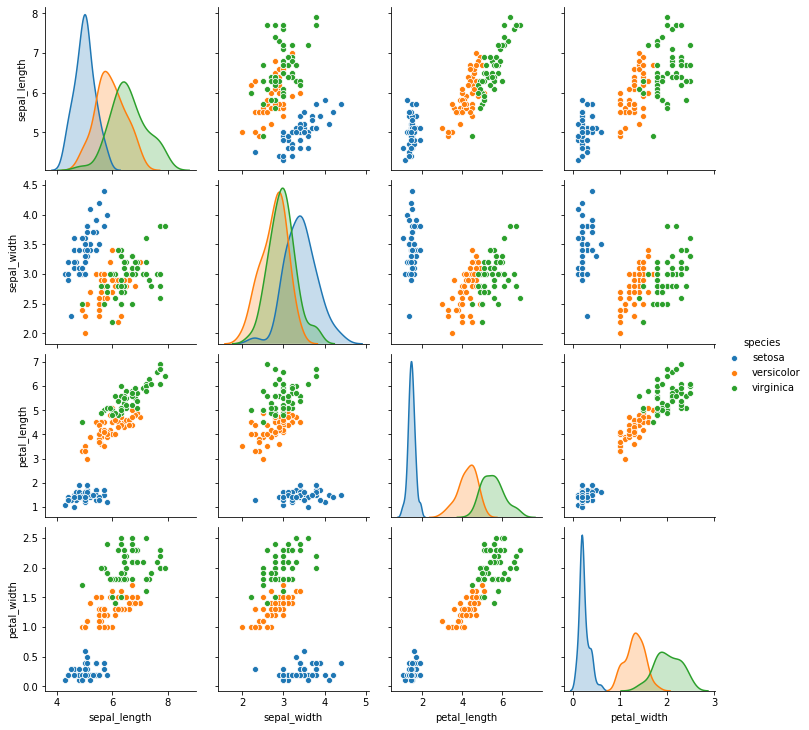

In [54]:
sns.pairplot(df , hue = 'species')

# -------------------------------------------------------------------------------------------------------------

## chi-square test
    The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

### to perform chi square test we use stats.chi2_contingency
    Chi-square test of independence of variables in a contingency table.
    
#### also stats.chi2

![Chi Square test formula](chiSquaretest.png)
    
[click to know more](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fchi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223&psig=AOvVaw0NZ4RnulS5G-6VfGRfOk9T&ust=1585146116117000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCNDektyns-gCFQAAAAAdAAAAABAD)

In [2]:
dataset = sns.load_dataset('tips')

In [4]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [7]:
print(dataset_table.values)

[[60 97]
 [33 54]]


In [8]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [10]:
val=stats.chi2_contingency(dataset_table)

In [11]:
val

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [12]:
Expected_Values=val[3]
print(Expected_Values)

[[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


In [13]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [14]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [15]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [16]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [17]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [18]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## Anova Test(F-Test)
    The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

    For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova) :-
    It tell whether two or more groups are similar or not based on their mean similarity and f-score.

    Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not
    
![One way F-test](oneWayFtest.png)

[to know more click here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.statsdirect.com%2Fhelp%2Fanalysis_of_variance%2Fone_way.htm&psig=AOvVaw1aIlgu5ivUzUtE3E1HMgqz&ust=1585194693127000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCPi0is7ctOgCFQAAAAAdAAAAABAI)

In [2]:
df1 = sns.load_dataset('iris')

In [3]:
df_anova = df1[['petal_width','species']]

grps = pd.unique(df_anova.species.values)

In [5]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}

In [7]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64, 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85   

In [8]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [9]:
print(p)

4.169445839443116e-85


In [11]:
function(p)

We are accepting null hypothesis
